In [ ]:
#MATPLOTLIB SLIDER TUTORIAL
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Initial x and y arrays
x = np.linspace(0, 10, 30)
y = np.sin(0.5*x)*np.sin(x*np.random.randn(30))

# Spline interpolation
spline = UnivariateSpline(x, y, s = 6)
x_spline = np.linspace(0, 10, 1000)
y_spline = spline(x_spline)

# Plotting
fig = plt.figure()
plt.subplots_adjust(bottom=0.25)
ax = fig.subplots()
p = ax.plot(x,y)
p, = ax.plot(x_spline, y_spline, 'g')

# Defining the Slider button
# xposition, yposition, width and height
ax_slide = plt.axes([0.25, 0.1, 0.65, 0.03])

# Properties of the slider
s_factor = Slider(ax_slide, 'Smoothing factor',
                  0.1, 6, valinit=6, valstep=0.2)

# Updating the plot
def update(val):
    current_v = s_factor.val
    spline = UnivariateSpline(x, y, s = current_v)
    p.set_ydata(spline(x_spline))
    #redrawing the figure
    fig.canvas.draw()
    
# Calling the function "update" when the value of the slider is changed
s_factor.on_changed(update)
plt.show()

In [ ]:
#Example of heatmap animation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib ipympl

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
dimension = (5, 5)
data = np.random.rand(dimension[0], dimension[1])
sns.heatmap(data, vmax=.8)

def init():
    sns.heatmap(np.zeros(dimension), vmax=.8, cbar=False)

def animate(i):
    data = np.random.rand(dimension[0], dimension[1])
    sns.heatmap(data, vmax=.8, cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat=False)
#line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=10, blit=False)

plt.show()

In [ ]:
#---------------------------------------------------------Heatmap with Slider---------------------------------------------------------------------#
# GET SOME MATPLOTLIB OBJECTS
# fig, ax = plt.subplots(figsize=(12, 8))
# plt.subplots_adjust(bottom=0.25)
# #line = ax.plot(dataSet[0], dataSet[1], lw=2, c='g')[0] # For line plot
 
# # AXES PROPERTIES
# plt.title("RSSI Heatmap", fontsize = 16)
# plt.ylabel("Node ID", fontsize = 16)
# plt.xlabel("Strip ID", fontsize = 16)

# #DISPLAY INITIAL IMAGE
# #im_ax = sns.heatmap(rssi_mat[numDataPoints-1], annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
# im_h = ax.imshow(rssi_mat[numDataPoints-1], cmap="YlGnBu")
# #cbar = fig.colorbar(im_h, ax=ax)
# cbar = plt.colorbar(im_h)
# cbar.set_label(label='RSSI (dBm)', size=16)
# cbar.ax.tick_params(labelsize=12) 


# # Defining the Slider button
# # xposition, yposition, width and height
# ax_slide = plt.axes([0.15, 0.15, 0.55, 0.03])

# # Properties of the slider
# timestamp = Slider(ax_slide, 'Timestamp (ms)',
#                   t.min(), t.max(), valinit=t.min(), valstep=delta_t)
 
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def update(val):
#     pos = timestamp.val
#     index = find_nearest(dataSet[3], pos)
#     im_h.set_data(rssi_mat[index])
    
# # Calling the function "update" when the value of the slider is changed
# timestamp.on_changed(update)
#plt.show()

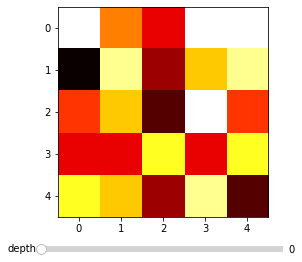

In [1]:
#HEATMAP WITH SLIDER
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider


#---------------------------------------------------------Animation Heatmap-----------------------------------------------------------------------#
def init():
    ax = sns.heatmap(rssi_mat, annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
    ax.figure.axes[-1].yaxis.label.set_size(16)
    plt.title("RSSI Heatmap", fontsize = 16)
    plt.ylabel("Node ID", fontsize = 16)
    plt.xlabel("Strip ID", fontsize = 16)

#def append_array()

def animate(num, rssi_mat, dataSet):
    #global rssi_mat, dataSet
    #rssi_mat[int(df_sf_final.loc[num,'node_id']) - 1][int(df_sf_final.loc[num,'strip_id']) - 1] = df_sf_final.loc[num,'rssi']
    rssi_mat[int(dataSet[1][num])-1][int(dataSet[0][num])-1] = (dataSet[2][num]) 
    #print(rssi_mat[int(dataSet[1][num])-1][int(dataSet[0][num])-1])
    #print(rssi_mat)
    #sns.heatmap(rssi_mat, cbar=False, cmap="YlGnBu")
    ax = sns.heatmap(rssi_mat, annot=True, cbar=False, cmap="YlGnBu")
    ax.figure.axes[-1].yaxis.label.set_size(16)
    plt.title("RSSI Heatmap", fontsize = 16)
    plt.ylabel("Node ID", fontsize = 16)
    plt.xlabel("Strip ID", fontsize = 16)
    plt.tight_layout()
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=numDataPoints, fargs=(rssi_mat, dataSet), interval=0.5, repeat=False, blit=False)
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------------#
    

# generate a five layer data 
# data = np.random.randint(10, size=(5, 5, 5))
# # current layer index start with the first layer 
# #print(data)
# idx = 0

# # figure axis setup 
# fig, ax = plt.subplots()
# fig.subplots_adjust(bottom=0.15)

# # display initial image 
# im_h = ax.imshow(data[:, :, idx], cmap='hot', interpolation='nearest')

# # setup a slider axis and the Slider
# ax_depth = plt.axes([0.23, 0.02, 0.56, 0.04])
# slider_depth = Slider(ax_depth, 'depth', 0, data.shape[2]-1, valinit=idx)

# # update the figure with a change on the slider 
# def update_depth(val):
#     idx = int(round(slider_depth.val))
#     im_h.set_data(data[:, :, idx])

# slider_depth.on_changed(update_depth)

# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
 
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    redDots.set_data(dataSet[0:2, :num])    
    redDots.set_3d_properties(dataSet[2, :num]) 
    return line
 
 
# THE DATA POINTS
t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)
x = np.cos(t)-1
y = 1/2*(np.cos(2*t)-1)
dataSet = np.array([x, y, t])
print(dataSet)
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
redDots = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='r', marker='o')[0] # For scatter plot
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=50, blit=False)
# line_ani.save(r'Animation.mp4')
 
 
plt.show()

In [ ]:
# #Heatmap animation over the time
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons

# #DEFINE DATASET ARRAY
# x_sf = df_sf_final['strip_id'].to_numpy()
# y_sf = df_sf_final['node_id'].to_numpy()
# z_sf = df_sf_final['rssi'].to_numpy()
# t_sf = df_sf_final['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]

# #print("dataset sf old:", dataSet_sf.shape)
# #test = np.delete(dataSet_sf, 0, axis=1)
# num_del_index = 0

# #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# for index in range(numDataPoints_sf-1):
#     if dataSet_sf[3][index] < 1660728942.00:
#        num_del_index += 1
#     # elif dataSet_sf[3][index] > 1659533598.97:
#     #     num_del_last_index  += 1


# print("old t_sf:", t_sf, t_sf.shape, "rssi old: ", rssi_mat.shape)

# dataSet_sf = np.delete(dataSet_sf, np.s_[0:num_del_index], axis=1)
# rssi_mat = np.delete(rssi_mat, np.s_[0:num_del_index], axis=0)
# x_sf = np.delete(x_sf, np.s_[0:num_del_index])
# y_sf = np.delete(y_sf, np.s_[0:num_del_index])
# z_sf = np.delete(z_sf, np.s_[0:num_del_index])
# t_sf = np.delete(t_sf, np.s_[0:num_del_index])


# numDataPoints_sf = dataSet_sf.shape[1]
# # print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# # print(dataSet_sf)

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

# #-------------------------------------------------------------------------------------------------------------------#

# #---------------------------------------------------------Animation Heatmap-----------------------------------------------------------------------#
# def init():
#     ax1 = fig.add_subplot(211) #(row, column, pos)
#     #ax1.set_autoscale_on
#     ax1.set_xlabel('Strip ID')
#     ax1.set_ylabel('Node ID')
#     ax1.set_title('RSSI Heatmap')

#     # ax = sns.heatmap(rssi_mat, annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
#     # ax.figure.axes[-1].yaxis.label.set_size(16)
#     # plt.title("RSSI Heatmap", fontsize = 16)
#     # plt.ylabel("Node ID", fontsize = 16)
#     # plt.xlabel("Strip ID", fontsize = 16)


# def animate(num, rssi_mat, dataSet):
#     im_h.set_data(rssi_mat[num]) 
#     #global rssi_mat, dataSet
#     #rssi_mat[int(df_sf_final.loc[num,'node_id']) - 1][int(df_sf_final.loc[num,'strip_id']) - 1] = df_sf_final.loc[num,'rssi']
#     #rssi_mat[int(dataSet[1][num])-1][int(dataSet[0][num])-1] = (dataSet[2][num]) 
#     # ax = sns.heatmap(rssi_mat, annot=True, cbar=False, cmap="YlGnBu")
#     # ax.figure.axes[-1].yaxis.label.set_size(16)
#     # plt.title("RSSI Heatmap", fontsize = 16)
#     # plt.ylabel("Node ID", fontsize = 16)
#     # plt.xlabel("Strip ID", fontsize = 16)
#     # plt.tight_layout()

# # def update_heatmap(val):
# #     pos = timestamp_rssi.val
# #     index = find_nearest(dataSet_sf[3], pos)
# #     im_h.set_data(rssi_mat[index])    
    
# ax1 = fig.add_subplot(111) #(row, column, pos)
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu")
# cbar = plt.colorbar(im_h, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=16)
# cbar.ax.tick_params(labelsize=12) 

# anim = animation.FuncAnimation(fig, animate, frames=numDataPoints_sf, fargs=(rssi_mat, dataSet_sf), interval=2, repeat=False, blit=False)
# plt.show()


In [ ]:
# #3D PLot Animation
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# %matplotlib ipympl
# from mpl_toolkits.mplot3d import Axes3D
 

# # ANIMATION FUNCTION
# def func(num, dataSet, line, redDots):
#     # NOTE: there is no .set_data() for 3 dim data...
#     line.set_data(dataSet[0:2, :num])    
#     line.set_3d_properties(dataSet[2, :num])    
#     redDots.set_data(dataSet[0:2, :num])    
#     redDots.set_3d_properties(dataSet[2, :num]) 
#     return line
 
 
# # THE DATA POINTS

# t = df_vicon_final['time'].to_numpy()
# x = df_vicon_final['X'].to_numpy()
# y = df_vicon_final['Y'].to_numpy()
# dataSet = np.array([x, y, t])
# numDataPoints = len(t)
 
# # GET SOME MATPLOTLIB OBJECTS
# fig = plt.figure(figsize=(15, 10))
# ax = Axes3D(fig)
# redDots = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='r', marker='o')[0] # For scatter plot
# # NOTE: Can't pass empty arrays into 3d version of plot()
# line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# # AXES PROPERTIES]
# # ax.set_xlim3d([limit0, limit1])
# ax.set_xlabel('X(t)')
# ax.set_ylabel('Y(t)')
# ax.set_zlabel('time')
# ax.set_title('Trajectory of robot')
 
# # Creating the Animation object
# line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=1, blit=False)
# #line_ani.save(r'Animation.mp4')
 
 
# plt.show()

In [ ]:
# #VICON PLOT WITH SLIDER
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# %matplotlib ipympl
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.widgets import Slider, Button, RadioButtons
 
# # THE DATA POINTS
# t = df_vicon_final['time'].to_numpy()
# x = df_vicon_final['X'].to_numpy()
# y = df_vicon_final['Y'].to_numpy()
# dataSet = np.array([x, y, t])
# numDataPoints = len(t)
# delta_t = round((t.max()-t.min())/numDataPoints, 6)

# # GET SOME MATPLOTLIB OBJECTS
# fig, ax = plt.subplots(figsize=(12, 8))
# plt.subplots_adjust(bottom=0.25)
# line = ax.plot(dataSet[0], dataSet[1], lw=2, c='g')[0] # For line plot

 
# # AXES PROPERTIES]
# ax.set_xlim(-11.185, 10.185)
# ax.set_ylim(-6.425, 7.575)
# ax.set_xlabel('X(t)')
# ax.set_ylabel('Y(t)')
# #ax.set_zlabel('time')
# ax.set_title('Trajectory of robot')

# # Defining the Slider button
# # xposition, yposition, width and height
# ax_slide = plt.axes([0.25, 0.15, 0.55, 0.03])

# # Properties of the slider
# timestamp = Slider(ax_slide, 'Timestamp (ms)',
#                   t.min(), t.max(), valinit=t.min(), valstep=delta_t)
 
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def update(val):
#     pos = timestamp.val
#     index = find_nearest(dataSet[2], pos)
#     line.set_xdata(dataSet[0, :index])
#     line.set_ydata(dataSet[1, :index])

#     #redrawing the figure
#     fig.canvas.draw()
    
# # Calling the function "update" when the value of the slider is changed
# timestamp.on_changed(update)
# plt.show()

In [ ]:
# #2nd option but slower
# df_sf_buf = df_sf.explode('data')
# df_sf_proc = pd.json_normalize(json.loads(df_sf_buf.to_json(orient="records")))
# df_sf_proc.rename(columns={'data.r':'rssi','data.m':'magnetometer'}, inplace=True)

# df_sf_proc[['mx','my','mz']] = pd.DataFrame(df_sf_proc.magnetometer.to_list(), index = df_sf_proc.index)
# df_sf_proc['rssi'] = df_sf_proc['rssi'].str.get(0)
# df_sf_proc = df_sf_proc.drop(columns=['magnetometer'])
# df_sf_proc[['strip_id', 'node_id']] = df_sf_proc[['strip_id', 'node_id']].astype(int)
# df_sf_proc.to_csv('out_2.csv')
# df_sf_proc

In [ ]:
# df_sf_final = df_sf_buf.copy()
# #df_sf_final = df_sf_final.groupby(df_sf_final.index // 19).mean()
# df_sf_final = df_sf_final.groupby(df_sf_final.index // 19)['rssi','mx','my','mz'].mean()
# #df_sf_final[['strip_id','node_id','column_num','ID']] = df_sf_final[['strip_id','node_id','column_num','ID']].round(0)
# df_sf_final.to_csv('out_3_test.csv')
# df_sf_final

In [ ]:
# #df_test = test2.groupby(test2.index // 19).mean()
# #df_test[f'r_avg'] = df_test.shift(-1).rolling(4,4).mean()
# df_test = test2.copy()
# #df_test = pd.DataFrame(np.einsum('ijk->ik',df_test.values.reshape(-1,9,df_test.shape[1]))/19.0)
# df_test = df_test.groupby(df_test.index // 19).mean()
# df_test[['strip_id','node_id','column_num','ID']] = df_test[['strip_id','node_id','column_num','ID']].round(0)
# #df_test['timestamp'] = pd.to_datetime(df_test['timestamp'],unit='s')
# df_test.to_csv('out2.csv')
# df_test

In [ ]:
# #CREATE FRAME FOR MERGED DATASET

# #INITIALIZE THE VARIABLES
# strip_id = ''
# node_id = ''

# rssi_val = ''
# timestamp = ''
# count = 0
# frame = ""

# #TRANSPOSE the dataset of VICON
# dataSet_vc_trans = np.transpose(dataSet_vc)
# array_frame_vc = dataSet_vc_trans.astype(object)

# #DEFINE STRING ARRAY FOR SF FRAME
# array_frame_sf = np.empty(rssi_mat.shape[0], dtype=object)

# #DEFINE STRING ARRAY FOR VICON FRAME
# dataSet_vc_trans = np.transpose(dataSet_vc)
# array_frame_vc = dataSet_vc_trans.astype(object)

# for index in range(rssi_mat.shape[0]):
#     for col in range(rssi_mat[index].shape[1]):
#         for row in range(rssi_mat[index].shape[0]):
#             if count == 0:
#                 strip_id += '{"strip_id":' + '{"' + str(count) + '":' + str(col+1) + ','
#                 node_id += ',"node_id":' + '{"' + str(count) + '":' + str(row+1) + ','
#                 rssi_val += ',"r":' + '{"' + str(count) + '":' + str(rssi_mat[index][row][col]) + ','
#                 timestamp += ',"timestamp":' + '{"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + ','
#                 count += 1
#             elif count == 344:
#                 strip_id += '"' + str(count) + '":' + str(col+1) + '}'
#                 node_id += '"' + str(count) + '":' + str(row+1) + '}'
#                 #rssi_val += '"' + str(count) + '":' + str(rssi_mat[345][row][col]) + '}' + '}'
#                 rssi_val += '"' + str(count) + '":' + str(rssi_mat[index][row][col]) + '}'
#                 timestamp += '"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + '}' + '}'
#                 count = 0
#             else:
#                 strip_id += '"' + str(count) + '":' + str(col+1) + ','
#                 node_id += '"' + str(count) + '":' + str(row+1) + ','
#                 rssi_val += '"' + str(count) + '":' + str(rssi_mat[index][row][col]) + ','
#                 timestamp += '"' + str(count) + '":' + str(timestamp_arr[index][row][col]) + ','
#                 count += 1
            

#     frame = strip_id + node_id + rssi_val + timestamp
#     #print(frame)
#     array_frame_sf[index] = frame
#     frame = ""
#     strip_id = ""
#     node_id = ""
#     rssi_val = ""
#     timestamp = ""

    
# print(array_frame_sf)

# def closest_timestamp(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# # frame_sf = pd.DataFrame(array_frame, columns=['data'])
# # frame_sf

# #MERGE DATASET
# frame_number = np.empty(array_frame_vc.shape[0], dtype=object)
# frame_data = np.empty(array_frame_vc.shape[0], dtype=object)
# frame_count = 0
# for row in range(array_frame_vc.shape[0]):
#     time_vc = dataSet_vc[2][row]
#     #index_vc = closest_timestamp(dataSet_vc[2], time_vc)
#     index_sf = closest_timestamp(dataSet_sf[3], time_vc)

#     frame_number[row] = str(frame_count)
#     frame_data[row] = array_frame_sf[index_sf]
#     frame_count += 1

# #print(frame_number)
# #print(frame_data)


### Backup Visualization program

In [ ]:
import paho.mqtt.client as mqtt #import the client1
import json
import numpy as np
import pandas as pd
from time import sleep, time
import seaborn as sns
import matplotlib.pylab as plt
from modules_lib.model import ModelWrapper


broker_address = "129.217.152.1"
data = []
accelerometer = []
gyroscope = []
magnetometer = []
rssi = []

timestamp = np.zeros((1,1))

rssi_avg = 0
magneto_avg = 0
accelero_avg = 0
gyro_avg = 0

count = 0
count_plt = 0
cond = True

# model_file_i = 'models/model_coords_old'
# model_wrapper = ModelWrapper(model_file_i)

KEYS = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r']

rssi_mat = np.zeros((23,15))
data_mag = np.zeros((23,15))

timestamps_array = []

X_data = np.zeros([23, 15, 10])
#rssi_data = np.zeros([1, 23, 15, 10])
t_i_array = np.zeros((23,15))
t_data = np.zeros((345, 1))
t_batch_i_old_arr = np.zeros((23,15))

# rssi_mat = np.zeros((15,23))
# data_mag = np.zeros((15,23))
data_mat = []

RPi_IPs = [
            {"column_num": 1, "ip_addr": "129.217.152.74", "mac_id": "b8:27:eb:41:99:a0", "hostname": "raspberrypi"},
            {"column_num": 2, "ip_addr": "129.217.152.111", "mac_id": "b8:27:eb:c0:fd:6a", "hostname": "raspberrypi"},
            {"column_num": 3, "ip_addr": "129.217.152.79", "mac_id": "b8:27:eb:18:92:c7", "hostname": "raspberrypi"},
            {"column_num": 4, "ip_addr": "129.217.152.54", "mac_id": "b8:27:eb:53:f2:33", "hostname": "raspberrypi"},
            {"column_num": 5, "ip_addr": "129.217.152.86", "mac_id": "b8:27:eb:e7:6f:dc", "hostname": "raspberrypi"},
            # {"column_num": 6, "ip_addr": "129.217.152.110", "mac_id": "b8:27:eb:9b:69:9a", "hostname": "raspberrypi"},
            {"column_num": 6, "ip_addr": "129.217.152.89", "mac_id": "b8:27:eb:38:4b:07", "hostname": "raspberrypi"},
            {"column_num": 7, "ip_addr": "129.217.152.84", "mac_id": "b8:27:eb:1b:cf:26", "hostname": "raspberrypi"},
            {"column_num": 8, "ip_addr": "129.217.152.119", "mac_id": "b8:27:eb:6d:0e:53", "hostname": "raspberrypi"},
            {"column_num": 9, "ip_addr": "129.217.152.77", "mac_id": "b8:27:eb:b7:a3:b7", "hostname": "raspberrypi"},
            {"column_num": 10, "ip_addr": "129.217.152.118", "mac_id": "b8:27:eb:be:dc:32", "hostname": "raspberrypi"},
            {"column_num": 11, "ip_addr": "129.217.152.69", "mac_id": "b8:27:eb:ff:a4:48", "hostname": "raspberrypi"},
            {"column_num": 12, "ip_addr": "129.217.152.59", "mac_id": "b8:27:eb:a9:7d:4d", "hostname": "raspberrypi"},
            {"column_num": 13, "ip_addr": "129.217.152.85", "mac_id": "b8:27:eb:c4:f8:c7", "hostname": "raspberrypi"},
            {"column_num": 14, "ip_addr": "129.217.152.48", "mac_id": "b8:27:eb:e4:43:6d", "hostname": "raspberrypi"},
            {"column_num": 15, "ip_addr": "129.217.152.63", "mac_id": "b8:27:eb:98:69:6e", "hostname": "raspberrypi"},
            {"column_num": 16, "ip_addr": "129.217.152.50", "mac_id": "b8:27:eb:75:c7:a2", "hostname": "raspberrypi"},
            {"column_num": 17, "ip_addr": "129.217.152.37", "mac_id": "b8:27:eb:09:3d:77", "hostname": "raspberrypi"},
            {"column_num": 18, "ip_addr": "129.217.152.60", "mac_id": "b8:27:eb:05:d8:4d", "hostname": "raspberrypi"},
            {"column_num": 19, "ip_addr": "129.217.152.64", "mac_id": "b8:27:eb:36:da:22", "hostname": "raspberrypi"},
            {"column_num": 20, "ip_addr": "129.217.152.62", "mac_id": "b8:27:eb:f5:5d:04", "hostname": "raspberrypi"},
            {"column_num": 21, "ip_addr": "129.217.152.51", "mac_id": "b8:27:eb:88:8d:56", "hostname": "raspberrypi"},
            {"column_num": 22, "ip_addr": "129.217.152.87", "mac_id": "b8:27:eb:00:be:93", "hostname": "raspberrypi"},
            {"column_num": 23, "ip_addr": "129.217.152.33", "mac_id": "b8:27:eb:c0:10:ae", "hostname": "raspberrypi"},
            ]

#Import vicon_node_positions.csv
Vicon_Coords = pd.read_csv("vicon_node_positions.csv")
print(Vicon_Coords)


def convert_strip_id(mac_id):
    if mac_id == 'b8:27:eb:41:99:a0':
        return 1
    elif mac_id == 'b8:27:eb:c0:fd:6a':
        return 2
    elif mac_id == 'b8:27:eb:18:92:c7':
        return 3
    elif mac_id == 'b8:27:eb:53:f2:33':
        return 4
    elif mac_id == 'b8:27:eb:e7:6f:dc':
        return 5
    elif mac_id == 'b8:27:eb:38:4b:07':
        return 6
    elif mac_id == 'b8:27:eb:1b:cf:26':
        return 7
    elif mac_id == 'b8:27:eb:6d:0e:53':
        return 8
    elif mac_id == 'b8:27:eb:b7:a3:b7':
        return 9
    elif mac_id == 'b8:27:eb:be:dc:32':
        return 10
    elif mac_id == 'b8:27:eb:ff:a4:48':
        return 11
    elif mac_id == 'b8:27:eb:a9:7d:4d':
        return 12
    elif mac_id == 'b8:27:eb:c4:f8:c7':
        return 13
    elif mac_id == 'b8:27:eb:e4:43:6d':
        return 14
    elif mac_id == 'b8:27:eb:98:69:6e':
        return 15
    elif mac_id == 'b8:27:eb:75:c7:a2':
        return 16
    elif mac_id == 'b8:27:eb:09:3d:77':
        return 17
    elif mac_id == 'b8:27:eb:05:d8:4d':
        return 18
    elif mac_id == 'b8:27:eb:36:da:22':
        return 19
    elif mac_id == 'b8:27:eb:f5:5d:04':
        return 20
    elif mac_id == 'b8:27:eb:88:8d:56':
        return 21
    elif mac_id == 'b8:27:eb:00:be:93':
        return 22
    elif mac_id == 'b8:27:eb:c0:10:ae':
        return 23

#Convert unix timestamps to Julian date format
# def Convert_to_julian_date(t_df):
    
#     time_i = []
#     offset = 2459828.75 #2459794.5 Julian epoch for 03.08.2022//Julian epoch for 5th August 2020: 2459067.00
#     time_stamps = pd.DatetimeIndex(t_df['timestamp']).to_julian_date()
 
#     for time_stamp in time_stamps:
#         # time_stamp = ((time_stamp / 86400.0) + 2440587.5)
#         time_i.append(time_stamp - offset)

#     time_i_avg = np.mean([a for j,a in enumerate(time_i) if a>=0])
#     t = time_i_avg * 24 * 60 * 60

#     return t

# def decode_data(j_msg, strip_id, node_id):
    
    global t_batch_i_old_arr, cnt
    
    delta_t = 0
    timestamp_i = 0
    data = j_msg['data']

    #check timestamp
    if t_batch_i_old_arr[strip_id-1][node_id-1] < j_msg['timestamp'] and t_batch_i_old_arr[strip_id-1][node_id-1] > 0:
    
        delta_t = (j_msg['timestamp'] - t_batch_i_old_arr[strip_id-1][node_id-1])/len(data)
        
        #print('1st: ', j_msg['timestamp'])
        #print('iter > 0: ', delta_t)
        t_i_batch_old = t_batch_i_old_arr[strip_id-1][node_id-1]
        t_batch_i_old_arr[strip_id-1][node_id-1] = j_msg['timestamp']
        print('iter > 0: ', t_i_batch_old)
        #print('2nd: ', t_batch_i_old_arr[strip_id-1][node_id-1])
        #cnt += 1
        #print('count: ', cnt)
        for i in range(len(data)):
            t_i = t_i_batch_old + ((1+i)*delta_t)
            t_i_array[strip_id-1][node_id-1] = t_i

            #print('iter > 0: ', t_i, t_i_array[strip_id-1][node_id-1], len(t_i_array))

            frame = ({'timestamp':t_i,'strip_id':strip_id,'node_id':node_id,
                'ax':data[i]['a'][0],'ay':data[i]['a'][1],'az':data[i]['a'][2],
                'gx':data[i]['g'][0],'gy':data[i]['g'][1],'gz':data[i]['g'][2],
                'mx':data[i]['m'][0],'my':data[i]['m'][1],'mz':data[i]['m'][2],
                'r':data[i]['r'][0]})
            for i, key in enumerate(KEYS):
                X_data[int(strip_id) - 1, node_id - 1, i] = frame[key]
        
    
            t_out = t_i_array.flatten()
            t_out_df = pd.DataFrame(t_out, columns=['timestamp'])
            t_out_df['timestamp'] = pd.to_datetime(t_out_df['timestamp'],unit='s')

            return t_out_df, X_data

#Convert unix timestamps to Julian date format
def Convert_to_julian_date(t_df):
    
    time_i = []
    offset = 2459828.75 #2459794.5 Julian epoch for 03.08.2022//Julian epoch for 5th August 2020: 2459067.00
    time_stamps = pd.DatetimeIndex(t_df['timestamp']).to_julian_date()
 
    for time_stamp in time_stamps:
        # time_stamp = ((time_stamp / 86400.0) + 2440587.5)
        time_i.append(time_stamp - offset)

    time_i_avg = np.mean([a for j,a in enumerate(time_i) if a>=0])
    t = time_i_avg * 24 * 60 * 60

    return t

def decode_data(j_msg, strip_id, node_id):
    
    global t_batch_i_old_arr, cnt
    
    delta_t = 0
    timestamp_i = 0
    data = j_msg['data']

    #check timestamp
    if t_batch_i_old_arr[strip_id-1][node_id-1] < j_msg['timestamp'] and t_batch_i_old_arr[strip_id-1][node_id-1] > 0:
    
        delta_t = (j_msg['timestamp'] - t_batch_i_old_arr[strip_id-1][node_id-1])/len(data)
        
        #print('1st: ', j_msg['timestamp'])
        #print('iter > 0: ', delta_t)
        t_i_batch_old = t_batch_i_old_arr[strip_id-1][node_id-1]
        t_batch_i_old_arr[strip_id-1][node_id-1] = j_msg['timestamp']
        print('iter > 0: ', t_i_batch_old)
        #print('2nd: ', t_batch_i_old_arr[strip_id-1][node_id-1])
        #cnt += 1
        #print('count: ', cnt)
        for i in range(len(data)):
            t_i = t_i_batch_old + ((1+i)*delta_t)
            t_i_array[strip_id-1][node_id-1] = t_i

            #print('iter > 0: ', t_i, t_i_array[strip_id-1][node_id-1], len(t_i_array))
            if data[i]['r'][0] < 0:

                frame = ({'timestamp':t_i,'strip_id':strip_id,'node_id':node_id,
                    'ax':data[i]['a'][0],'ay':data[i]['a'][1],'az':data[i]['a'][2],
                    'gx':data[i]['g'][0],'gy':data[i]['g'][1],'gz':data[i]['g'][2],
                    'mx':data[i]['m'][0],'my':data[i]['m'][1],'mz':data[i]['m'][2],
                    'r':data[i]['r'][0]})
                for i, key in enumerate(KEYS):
                    X_data[int(strip_id) - 1, node_id - 1, i] = frame[key]
                
                t_out = t_i_array.flatten()
                t_out_df = pd.DataFrame(t_out, columns=['timestamp'])
                t_out_df['timestamp'] = pd.to_datetime(t_out_df['timestamp'],unit='s')

                print("RSSI normal")

                return t_out_df, X_data
            else:
                frame = ({'timestamp':t_i,'strip_id':strip_id,'node_id':node_id,
                    'ax':data[i]['a'][0],'ay':data[i]['a'][1],'az':data[i]['a'][2],
                    'gx':data[i]['g'][0],'gy':data[i]['g'][1],'gz':data[i]['g'][2],
                    'mx':data[i]['m'][0],'my':data[i]['m'][1],'mz':data[i]['m'][2],
                    'r':np.nan})
                for i, key in enumerate(KEYS):
                    X_data[int(strip_id) - 1, node_id - 1, i] = frame[key]
            
                
                t_out = t_i_array.flatten()
                t_out_df = pd.DataFrame(t_out, columns=['timestamp'])
                t_out_df['timestamp'] = pd.to_datetime(t_out_df['timestamp'],unit='s')

                print("RSSI is zero")

                return t_out_df, X_data              

        
    elif t_batch_i_old_arr[strip_id-1][node_id-1] == 0:
        #print('1st: ', j_msg['timestamp'])
        delta_t = 4/19
        
        t_i_batch_old = j_msg['timestamp'] - 4
        t_batch_i_old_arr[strip_id-1][node_id-1] = j_msg['timestamp']
        #print('2nd: ', t_i_batch_old, t_batch_i_old_arr[strip_id-1][node_id-1])
        print('iter 0: ', strip_id, node_id, t_i_batch_old, t_batch_i_old_arr[strip_id-1][node_id-1] )

        for i in range(len(data)):
            t_i = t_i_batch_old + ((1+i)*delta_t)
            t_i_array[strip_id-1][node_id-1] = t_i
            
            if data[i]['r'][0] < 0:

                frame = ({'timestamp':t_i,'strip_id':strip_id,'node_id':node_id,
                    'ax':data[i]['a'][0],'ay':data[i]['a'][1],'az':data[i]['a'][2],
                    'gx':data[i]['g'][0],'gy':data[i]['g'][1],'gz':data[i]['g'][2],
                    'mx':data[i]['m'][0],'my':data[i]['m'][1],'mz':data[i]['m'][2],
                    'r':data[i]['r'][0]})
                for i, key in enumerate(KEYS):
                    X_data[int(strip_id) - 1, node_id - 1, i] = frame[key]
            
                
                t_out = t_i_array.flatten()
                t_out_df = pd.DataFrame(t_out, columns=['timestamp'])
                t_out_df['timestamp'] = pd.to_datetime(t_out_df['timestamp'],unit='s')

                print("0, RSSI normal")

                return t_out_df, X_data
            else:
                frame = ({'timestamp':t_i,'strip_id':strip_id,'node_id':node_id,
                    'ax':data[i]['a'][0],'ay':data[i]['a'][1],'az':data[i]['a'][2],
                    'gx':data[i]['g'][0],'gy':data[i]['g'][1],'gz':data[i]['g'][2],
                    'mx':data[i]['m'][0],'my':data[i]['m'][1],'mz':data[i]['m'][2],
                    'r':np.nan})
                for i, key in enumerate(KEYS):
                    X_data[int(strip_id) - 1, node_id - 1, i] = frame[key]
            
                
                t_out = t_i_array.flatten()
                t_out_df = pd.DataFrame(t_out, columns=['timestamp'])
                t_out_df['timestamp'] = pd.to_datetime(t_out_df['timestamp'],unit='s')

                print("0, RSSI is zero")
                return t_out_df, X_data  
# This is the Subscriber
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))
    for RPi in RPi_IPs:
        for node in range(1,16): # range 1 to 16 is an array from 1 to 15.
            client.subscribe("imu_reader/"+RPi['mac_id']+"/"+str(node))

def store_and_publish_msg(strip_id, node_id, rssi, magnetometer):

    print("Filtered: ", strip_id, node_id, rssi, magnetometer)
    timestamp = time()
    data_to_store = str(timestamp) + ", " + str(strip_id) + ", " + str(node_id) + ", " + str(
        rssi) + ", " + str(magnetometer)

    with open("datalog.txt", "a") as test_data:
        test_data.write("Filtered: " + data_to_store + '\n')
    test_data.close()
    # print(strip_id, j_msg['node_id'], magneto_avg, magnetometer)

    df2 = Vicon_Coords.loc[
        (Vicon_Coords['strip_id'] == strip_id) & (Vicon_Coords['node_id'] == float(node_id))]
    x_coord = df2['vicon_x'].values[0].round(3)
    y_coord = df2['vicon_y'].values[0].round(3)

    print(x_coord, y_coord)

    # #construct topic for publishing message and received by unity laser program
    mqtt_publish_topic = 'imu_reader/viconpos'
    # publish_start_time = time()
    msg_to_laser = {"subject": "MR-1", "duration": 10, "color": "red", "shape": "circle",
                    "pointCount": 16, "animation": "pulse", "visible": "true",
                    "xpos": x_coord, "ypos": y_coord, "vicon_tracker": "false"}
    ret = client.publish(mqtt_publish_topic, json.dumps(msg_to_laser))
    print(msg_to_laser)

def on_message(client, userdata, msg):
    if msg.payload.decode():
        global count, count_plt, rssi_mat, data_mag
        j_msg = json.loads(msg.payload.decode('utf-8'))
        data = j_msg['data']

        # for i in range(len(data)):
        #     rssi.append(data[i]['r'])
        #     #print((data[i]['r']))
        #     magnetometer.append(data[i]['m'])

        # rssi_avg = np.round(np.mean(rssi, axis=0),2)
        # magneto_avg = np.round(np.mean(magnetometer, axis=0),2)
        strip_id = convert_strip_id(j_msg['strip_id'])
        node_id = int(j_msg['node_id'])

        #to plot the heatmap //uncomment this section
        count += 1
        if count == 1000:
            count_plt += 1
            print(count)
            count = 0
            print("--------------------------------------------------------")
            #t_df, sensor_data = decode_data(j_msg, strip_id, node_id)
            #sensor_data = np.transpose(sensor_data, [0,2,1,3])
            

            print(rssi_mat)
            print(data_mag)
            rssi_mat_transpose = np.transpose(rssi_mat)
            fig = plt.figure(figsize=(12, 14))
          
            ax1 = fig.add_subplot(211)
            #ax1 = plt.subplots(figsize=(10,7))
            ax1 = sns.heatmap(rssi_mat_transpose, annot=False, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
            ax1.figure.axes[-1].yaxis.label.set_size(14)
       
            plt.title("RSSI Heatmap", fontsize = 16)
            plt.ylabel("Node ID", fontsize = 16)
            plt.xlabel("Strip ID", fontsize = 16)
            #plt.figure(figsize=(1.589, 9.88), dpi=100)
            #plt.tight_layout()
            #plt.savefig('0209_RSSI_Static_test2' + str(count_plt) + '.png')
            #plt.show()

            data_mag_transpose = np.transpose(data_mag)
            ax2 = fig.add_subplot(212)
            ax2 = sns.heatmap(data_mag_transpose, annot=False, cbar_kws={'label': 'Magnetic Field'}, cmap="YlGnBu")
            ax2.figure.axes[-1].yaxis.label.set_size(14)
    
            plt.title("Magnetometer Heatmap", fontsize = 16)
            plt.ylabel("Node ID", fontsize = 16)
            plt.xlabel("Strip ID", fontsize = 16)
            #plt.figure(figsize=(1.589, 9.88), dpi=100)
            #plt.tight_layout()
            #plt.savefig('0209_Mag_Static_test2' + str(count_plt) + '.png')
            plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.9, hspace=0.3)
            plt.show()

        else:
            t_df, sensor_data = decode_data(j_msg, strip_id, node_id)
            sensor_data = np.transpose(sensor_data, [1,0,2])
            
            rssi_mat = sensor_data[:,:,9]
            data_mag = sensor_data[:,:,6]
            #store the rssi and magnetometer values to corresponding array index of strip and node ids
            # rssi_mat[int(strip_id) - 1][node_id - 1] = rssi_avg[0]
            # data_mag[int(strip_id) - 1][node_id - 1] = magneto_avg[0]

            # rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] = rssi_avg[0]
            # data_mag[int(j_msg['node_id']) - 1][int(strip_id) - 1]  = magneto_avg[0]


            # conditions to determine the highest densed RSSI values in certain location
            # if strip_id > 0 and strip_id < 22 and int(j_msg['node_id']) > 0 and int(j_msg['node_id']) < 14:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) + 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] < -20 and
            #         #rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) + 1][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id) - 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

            # elif strip_id == 0 and int(j_msg['node_id']) > 0 and int(j_msg['node_id']) < 14:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id) + 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

            # elif strip_id == 22 and int(j_msg['node_id']) > 0 and int(j_msg['node_id']) < 14:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) - 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id) - 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

            # elif strip_id == 0 and int(j_msg['node_id']) == 0:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) + 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id) + 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) + 1][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id) + 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

            # elif strip_id == 0 and int(j_msg['node_id']) == 14:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) + 1][int(j_msg['node_id']) - 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id) + 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) + 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

            # elif strip_id == 22 and int(j_msg['node_id']) == 0:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) + 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) + 1] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) + 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id) - 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) + 1][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id']) + 1][int(strip_id) - 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

            # elif strip_id == 22 and int(j_msg['node_id']) == 14:

            #     # if (rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id']) - 1] < -20 and
            #     #     rssi_mat[int(strip_id)][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id)][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id'])] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id'])] < -20 and
            #     #     rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) - 1] > -70 and rssi_mat[int(strip_id) - 1][int(j_msg['node_id']) - 1] < -20):

            #     if (rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id)] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id)] < -20 and
            #         rssi_mat[int(j_msg['node_id'])][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id'])][int(strip_id) - 1] < -20 and
            #         rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] > -70 and rssi_mat[int(j_msg['node_id']) - 1][int(strip_id) - 1] < -20):

            #             store_and_publish_msg(strip_id, j_msg['node_id'], rssi_avg[0], magneto_avg[0])

        #timestamp = time()
        #data_to_store = str(timestamp) + ", " + str(strip_id) + ", " + str(j_msg['node_id']) + ", " + str(rssi_avg[0]) + ", " + str(magneto_avg[0])

        # with open("datalog.txt", "a") as test_data:
        #     test_data.write(data_to_store + '\n')
        # test_data.close()

        # #print(count)
        # print(strip_id, j_msg['node_id'], "rssi avg: ", rssi_avg,"avg magneto: ", magneto_avg)

        #rssi.clear()
        #magnetometer.clear()

        #otsu library for thresholding

#fab imuread must run in parallel to trigger the broker
#Set paho mqtt callback
client = mqtt.Client("test_client") #create new instance
client.connect(broker_address, 8883, 60) #connect to broker
print("connecting to broker")

client.on_connect = on_connect
client.on_message = on_message
client.enable_bridge_mode()
client.loop_forever()

# try:
#     client.loop_forever()
# except:
#   print('disconnect')
#   client.disconnect()